In [ ]:
import os
os.chdir('Covid 19 Project')

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet,VGG16,DenseNet121,ResNet152,InceptionResNetV2,InceptionV3,VGG19,ResNet50
from keras.applications.mobilenet import preprocess_input
# from keras.applications.resnet50 import preprocess_input

from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc
# from mlxtend.evaluate import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
import tensorflow as tf

In [ ]:
!pip install catboost

In [ ]:
# Loading Training Images
normal_images=os.listdir(os.path.join('Training Dataset','normal'))
covid_images=os.listdir(os.path.join('Training Dataset','covid'))

In [ ]:
# Empty DataFrame
normal_image_df=pd.DataFrame()
covid_image_df=pd.DataFrame()

In [ ]:
normal_image_df['ID']=normal_images
normal_image_df['label']='normal'

In [ ]:
covid_image_df['ID']=covid_images
covid_image_df['label']='covid'

In [ ]:
covid_image_df

,ID,label
0,ryct.2020003.fig2-a.png,covid
1,ryct.2020200028.fig1a.jpeg,covid
2,2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg,covid
3,pneumocystis-jiroveci-pneumonia-4-L.png,covid
4,16708_4_1.jpg,covid
...,...,...
299,cavitating-pneumonia-4-day28-PA.png,covid
300,covid-19-pneumonia-progression-and-regression-...,covid
301,all14238-fig-0002-m-e.jpg,covid
302,5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg,covid


In [ ]:
train_df=pd.concat([normal_image_df,covid_image_df],ignore_index=True)

In [ ]:
train_df.head(10)

,ID,label
0,NORMAL2-IM-1196-0001.jpeg,normal
1,NORMAL2-IM-0808-0001.jpeg,normal
2,IM-0429-0001-0002.jpeg,normal
3,NORMAL2-IM-0689-0001.jpeg,normal
4,NORMAL2-IM-0979-0001.jpeg,normal
5,NORMAL2-IM-1184-0001.jpeg,normal
6,IM-0668-0001.jpeg,normal
7,NORMAL2-IM-0401-0001.jpeg,normal
8,IM-0656-0001.jpeg,normal
9,NORMAL2-IM-0596-0001.jpeg,normal


In [ ]:
len(train_df)

608

In [ ]:
# Loading Train Images
train_images = []
train_labels=[]
for img_name,label in zip(train_df.ID,train_df.label):
  if label=='normal':
      img = cv2.imread(os.path.join('Training Dataset/normal',img_name))
      img=cv2.resize(img,(224,224))
      if img is not None:
          train_images.append(img)
          train_labels.append('normal')
  else:
      img=cv2.imread(os.path.join('Training Dataset/covid',img_name))
      img=cv2.resize(img,(224,224))
      if img is not None:
        train_images.append(img)
        train_labels.append('covid')


In [ ]:
len(train_images)

608

In [ ]:
# Loading Testing Images
test_normal_images=os.listdir(os.path.join('Testing Dataset/normal'))
test_covid_images=os.listdir(os.path.join('Testing Dataset/covid'))

In [ ]:
len(test_covid_images)

549

In [ ]:
# Empty DataFrame
test_normal_image_df=pd.DataFrame()
test_covid_image_df=pd.DataFrame()

In [ ]:
test_normal_image_df['ID']=test_normal_images
test_normal_image_df['label']='normal'

In [ ]:
test_covid_image_df['ID']=test_covid_images
test_covid_image_df['label']='covid'

In [ ]:
test_df=pd.concat([test_normal_image_df,test_covid_image_df],ignore_index=True)

In [ ]:
len(test_df)

783

In [ ]:
len(list(set(test_normal_images)))

234

In [ ]:
# Loading Testing Images
test_images = []
test_labels=[]
for img_name,label in zip(test_df.ID,test_df.label):
  if label=='normal':
        img = cv2.imread(os.path.join('Testing Dataset/normal',img_name))
        img=cv2.resize(img,(224,224))
        if img is not None:
            test_images.append(img)
            test_labels.append('normal')
  else:
      img=cv2.imread(os.path.join('Testing Dataset/covid',img_name))
      img=cv2.resize(img,(224,224))
      if img is not None:
        test_images.append(img)
        test_labels.append('covid')


In [ ]:
train_images=np.array(train_images)
test_images=np.array(test_images)

In [ ]:
# # Normalizing Train and Test Images
# train_images=train_images/255.
# test_images=test_images/255.

In [ ]:
len(test_images)

783

In [ ]:
# Feature Extraction for train
model = MobileNet(weights='imagenet', include_top=False)
# model = VGG16(weights='imagenet', include_top=False)
# model = DenseNet121(weights='imagenet', include_top=False)
# model = ResNet152(weights='imagenet', include_top=False)
# model = InceptionResNetV2(weights='imagenet', include_top=False)
# model = InceptionV3(weights='imagenet', include_top=False)
# model = VGG19(weights='imagenet', include_top=False)

model_feature_list = []

for img in train_images:  
    img_data = np.expand_dims(img, axis=0)
    img_data = preprocess_input(img_data)

    model_feature = model.predict(img_data)
    model_feature_np = np.array(model_feature)
    model_feature_list.append(model_feature_np.flatten())

train_x = np.array(model_feature_list)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [ ]:
# Feature Extraction for test
model = MobileNet(weights='imagenet', include_top=False)
# model = VGG16(weights='imagenet', include_top=False)
# model = DenseNet121(weights='imagenet', include_top=False)
# model = ResNet152(weights='imagenet', include_top=False)
# model = InceptionResNetV2(weights='imagenet', include_top=False)
# model = InceptionV3(weights='imagenet', include_top=False)
# model = VGG19(weights='imagenet', include_top=False)
model_feature_list = []

for img in test_images:  
    img_data = np.expand_dims(img, axis=0)
    img_data = preprocess_input(img_data)

    model_feature = model.predict(img_data)
    model_feature_np = np.array(model_feature)
    model_feature_list.append(model_feature_np.flatten())

test_x = np.array(model_feature_list)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [ ]:
# Label Encoding
train_y=pd.Series(train_labels)
label_encode={'normal':0,'covid':1}
train_y=train_y.replace(label_encode)
test_y=pd.Series(test_labels)
test_y=test_y.replace(label_encode)
train_y=train_y.astype('category')
test_y=test_y.astype('category')

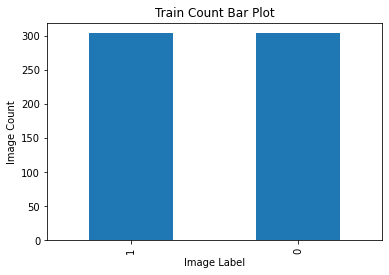

In [ ]:
# Count Bar Plot Train
train_y.value_counts().plot(kind='bar')
plt.plot()
plt.title('Train Count Bar Plot')
plt.xlabel('Image Label')
plt.ylabel('Image Count')
plt.show()


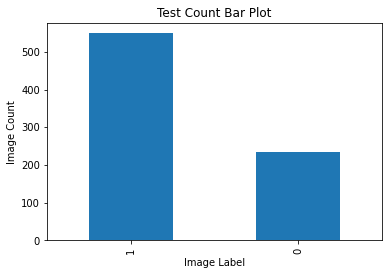

In [ ]:
# Count Bar Plot on Test Data
test_y.value_counts().plot(kind='bar')
plt.plot()
plt.title('Test Count Bar Plot')
plt.xlabel('Image Label')
plt.ylabel('Image Count')
plt.show()

In [ ]:
test_y.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
# Fitting the Classifier
# classifier=SVC(kernel='rbf',C=0.5)
# classifier.fit(train_x,train_y)


# classifier=RandomForestClassifier(n_estimators=400,max_depth=7)
# classifier.fit(train_x,train_y)

# model = CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='Accuracy',use_best_model=True,random_seed=42,gpu_ram_part=0.3,gpu_cat_features_storage='CpuPinnedMemory')
# model.fit(train_x,train_y,eval_set=(test_x,test_y))
# classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42,n_estimators=1000)
# classifier.fit(train_x,train_y)
# classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
# classifier= LGBMClassifier(boosting_type='gbdt',objective='binary',metric='accuracy')
classifier=KNeighborsClassifier(n_neighbors=120,p=2)
classifier.fit(train_x,train_y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=120, p=2,
                     weights='uniform')

In [ ]:
# # n_neighbors selection
# neighbors = list(range(1,20))
# train_results = []
# test_results = []
# for n in neighbors:
#    model = KNeighborsClassifier(n_neighbors=n)
#    model.fit(train_x, train_y)
#    train_pred = model.predict(train_x)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = model.predict(test_x)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
# line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('n_neighbors')
# plt.show()

In [ ]:
neighbors = list(range(1,200))

In [ ]:
neighbors

In [ ]:
# # Hyperparameter Tuning
# param_grid = {'n_neighbors':[80,90,120,200]}
# grid=GridSearchCV(estimator=KNeighborsClassifier(),cv=5,param_grid=param_grid)
# grid.fit(train_x,train_y)  

In [ ]:
# print('Best Parameters',grid.best_params_)

In [ ]:
# Predicting the Train Set Results
y_pred_train=classifier.predict(train_x)

In [ ]:
# # Reshaping the Test Data
# test_x=np.reshape(test_images, (test_images.shape[0], -1))

In [ ]:
# test_x.shape

In [ ]:
# Predicting the Test Set Results
y_pred_test=classifier.predict(test_x)

In [ ]:
#Checking the Accuracy

print("Training Accuracy is:",accuracy_score(train_y,y_pred_train))

print("Testing Accuracy is:",accuracy_score(test_y,y_pred_test))

Training Accuracy is: 0.9917763157894737
Testing Accuracy is: 0.9910600255427842


[Text(0, 0.5, 'Covid'), Text(0, 1.5, 'Normal')]

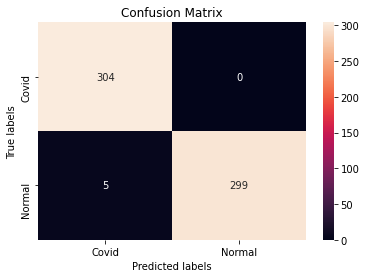

In [ ]:
# Confusion Matrix for training data

cm=confusion_matrix(train_y, y_pred_train,labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Covid', 'Normal'])
ax.yaxis.set_ticklabels(['Covid','Normal'])

# cm=confusion_matrix(y_target=train_y,y_predicted=y_pred_train)
# fig,ax=plot_confusion_matrix(conf_mat=cm,cmap='Dark2',colorbar=True)
# labels=['normal','covid']
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)

# plt.title('Confusion Matrix')

# plt.show()


[Text(0, 0.5, 'Covid'), Text(0, 1.5, 'Normal')]

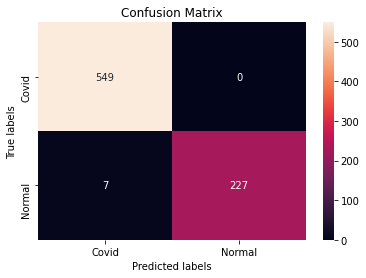

In [ ]:
# Confusion Matrix for testing data

cm=confusion_matrix(test_y, y_pred_test,labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Covid', 'Normal'])
ax.yaxis.set_ticklabels(['Covid','Normal'])
# cm=confusion_matrix(y_target=test_y,y_predicted=y_pred_test)
# fig,ax=plot_confusion_matrix(conf_mat=cm,cmap='Dark2',colorbar=True)
# labels=['normal','covid']
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)

# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
y_pred_test=pd.Series(y_pred_test)
y_pred_test.value_counts()

1    570
0    213
dtype: int64

In [ ]:
# Training Classification Report
print(classification_report(train_y,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



In [ ]:
# Testing Classification Report
print(classification_report(test_y,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       234
           1       0.96      1.00      0.98       549

    accuracy                           0.97       783
   macro avg       0.98      0.96      0.97       783
weighted avg       0.97      0.97      0.97       783



In [ ]:
# Checking the Cross Validation Score on Train Data
scores_train = cross_val_score(classifier,train_x, train_y, cv=10,scoring='accuracy')

In [ ]:
# Checking the Cross Validation Score on Test Data
scores_test=cross_val_score(classifier,test_x,test_y,cv=10,scoring='accuracy')

In [ ]:
print('Mean Cross Validation Train Score:{}'.format(np.mean(scores_train)))
print('Mean Cross Validation Test Score:{}'.format(np.mean(scores_test)))